In [1]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import pearsonr


df_clients_profile = pd.read_csv('../Data/raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/raw/df_final_experiment_clients.txt')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

## Drop duplicates values

In [2]:
#clean df_clients_profile
df_clients_profile = print_clean_data(df_clients_profile)

Before
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
------------------------------------------
------------------------------------------
After
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [3]:
#clean df_experiment_clients
df_experiment_clients = print_clean_data(df_experiment_clients)

Before
client_id        0
Variation    20109
dtype: int64
------------------------------------------
To many NaN values in column: Variation
------------------------------------------
After
client_id        0
Variation    20109
dtype: int64


In [4]:
#clean df_web_data
df_web_data = print_clean_data(df_web_data)

Before
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
------------------------------------------
------------------------------------------
After
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [5]:
df_web_data.head(5)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


## Create a data frame with the clients that won't participe in the experiment.

In [6]:
#setting aside the clients that wont be part if the experiment
null_df_experiment_clients = df_experiment_clients[df_experiment_clients['Variation'].isnull()]
null_df_experiment_clients

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


## Merge the clients in the web data

### Identify the clients part of the test group

In [7]:
#id of clients that are part of the test
df_experiment_clients_Test = df_experiment_clients[df_experiment_clients['Variation'] == 'Test']
df_experiment_clients_Test.head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
3,1982004,Test
5,9466803,Test
6,3170143,Test
8,5887227,Test
10,438567,Test
11,2519971,Test
13,5407849,Test
16,5308474,Test


### df_test: combine visit_id with visitor_id and reoganize the columns.

In [8]:
final_df_Test = pd.merge(df_experiment_clients_Test, df_clients_profile, on='client_id', how='inner')
final_df_Test = pd.merge(df_web_data, final_df_Test, on='client_id', how='inner')
df_test = final_df_Test

#change the data type to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time']) 
df_test.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


### df_control: combine visit_id with visitor_id and reoganize the columns.

In [9]:
#id of clients that are part of the control group
df_experiment_clients_Control = df_experiment_clients[df_experiment_clients['Variation'] == 'Control']
df_experiment_clients_Control.head(10)

,client_id,Variation
2,4033851,Control
4,9294070,Control
7,6651403,Control
9,2105948,Control
12,9814849,Control
14,7286739,Control
15,4446011,Control
20,4229407,Control
24,2842481,Control
27,1218661,Control


In [10]:
df_experiment_clients_Control = df_experiment_clients[df_experiment_clients['Variation'] == 'Control']
final_df_Control = pd.merge(df_experiment_clients_Control, df_clients_profile, on='client_id', how='inner')
final_df_Control = pd.merge(df_web_data, final_df_Control, on='client_id', how='inner')
df_control = final_df_Control

#change the data type to datetime
df_control['date_time'] = pd.to_datetime(df_control['date_time']) 
df_control.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


## Pivot and create new columns

### df_test

In [11]:
df_test

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177782,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
177783,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
177784,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
177785,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0


In [12]:
# Assuming df_control is your DataFrame
# 1. Data Preparation:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test['date'] = df_test['date_time'].dt.date
# Combine visit_id and visitor_id into a new column
df_test['visit_visitor_id'] = df_test['visit_id'].astype(str) + "_" + df_test['visitor_id'].astype(str)

In [13]:
# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_test = df_test.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_test['next_date_time'] = df_test.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)

# Calculate time spent in seconds, but make sure it's always positive
df_test['time_diff_seconds'] = (df_test['next_date_time'] - df_test['date_time']).dt.total_seconds()
df_test['time_diff_minutes'] = df_test['time_diff_seconds'] / 60

In [14]:
# 3. Pivot to Create Step Columns:
df_pivot = df_test.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0, aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header
df_pivot.head(10)

,client_id,visitor_id,visit_id,confirm,start,step_1,step_2,step_3
0,555,402506806_56087378777,637149525_38041617439_716659,0.000000,0.116667,0.533333,1.650000,0.333333
1,647,66758770_53988066587,40369564_40101682850_311847,0.000000,0.116667,0.300000,3.150000,2.716667
2,934,810392784_45004760546,7076463_57954418406_971348,0.000000,2.366667,0.000000,0.000000,0.000000
3,1336,920624746_32603333901,583743392_96265099036_939815,0.000000,0.416667,0.433333,0.850000,1.816667
4,1336,920624746_32603333901,614001770_19101025926_112779,1.366667,0.000000,0.000000,0.000000,0.000000
5,1346,123474046_4204671056,27144337_83739845380_214282,0.000000,2.650000,3.366667,0.816667,1.416667
6,1516,182314299_63168583136,255400977_38039535960_779641,0.000000,0.933333,0.583333,10.116667,4.266667
7,1516,182314299_63168583136,481123290_95510977345_707323,0.000000,1.333333,1.666667,1.083333,0.000000
8,1643,121807985_20524560478,753205700_16851596206_134483,0.000000,1.000000,0.266667,9.700000,0.500000
9,1643,910842861_51062379179,379946188_1773022140_107963,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)

# 5. Merge with Original Data and Select/Reorder Columns:
final_df_t = pd.merge(df_pivot, df_test[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

In [16]:
# Get last step per visit_id
final_df_t['last_step'] = final_df_t.groupby('visit_id')['process_step'].transform('last')

# Add new columns bt_1, bt_2, bt_3 for counts of step_1, step_2, step_3
step_counts = df_test.groupby(['visit_visitor_id', 'process_step']).size().unstack(fill_value=0)

# Add bt_1, bt_2, bt_3 columns to final_df
final_df_t['visit_visitor_id'] = final_df_t['visit_id'].astype(str) + "_" + final_df_t['visitor_id'].astype(str)
final_df_t['bt_1'] = final_df_t['visit_visitor_id'].map(step_counts.get('step_1', pd.Series())).fillna(0).astype(int)
final_df_t['bt_2'] = final_df_t['visit_visitor_id'].map(step_counts.get('step_2', pd.Series())).fillna(0).astype(int)
final_df_t['bt_3'] = final_df_t['visit_visitor_id'].map(step_counts.get('step_3', pd.Series())).fillna(0).astype(int)

# Create completion column
final_df_t['completion'] = final_df_t['last_step'].apply(lambda x: 1 if x == 'confirm' else 0)

# Create total_navigation column
final_df_t['total_navigations'] = final_df_t['bt_1'] + final_df_t['bt_2'] + final_df_t['bt_3']

In [17]:
# Drop visit_visitor_id column if no longer needed
final_df_t.drop(['visit_id', 'visitor_id','process_step', 'confirm_time'], axis=1, inplace=True)
final_df_t.drop_duplicates(subset='visit_visitor_id', keep='first', inplace=True)
# Reorder columns to place total_navigation after bt_3 and completed at the end
df_test_final = final_df_t.reindex(columns=[
    'client_id', 'visit_visitor_id', 'start_time', 'step_1', 'step_2', 'step_3', 
    'date', 'bt_1', 'bt_2', 'bt_3', 'total_navigations', 'last_step', 'completion',
    'total_time_visit', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 
    'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'
])


In [18]:
df_test_final.head(10)

,client_id,visit_visitor_id,start_time,step_1,step_2,step_3,date,bt_1,bt_2,bt_3,total_navigations,last_step,completion,total_time_visit,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,555,637149525_38041617439_716659_402506806_5608737...,0.116667,0.533333,1.650000,0.333333,2017-04-15,1,1,1,3,confirm,1,2.633333,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
5,647,40369564_40101682850_311847_66758770_53988066587,0.116667,0.300000,3.150000,2.716667,2017-04-12,1,1,1,3,confirm,1,6.283333,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0
10,934,7076463_57954418406_971348_810392784_45004760546,2.366667,0.000000,0.000000,0.000000,2017-04-18,0,0,0,0,start,0,2.366667,Test,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0
14,1336,583743392_96265099036_939815_920624746_3260333...,0.416667,0.433333,0.850000,1.816667,2017-05-08,1,1,1,3,confirm,1,3.516667,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0
19,1336,614001770_19101025926_112779_920624746_3260333...,0.000000,0.000000,0.000000,0.000000,2017-05-08,0,0,0,0,confirm,1,1.366667,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0
21,1346,27144337_83739845380_214282_123474046_4204671056,2.650000,3.366667,0.816667,1.416667,2017-06-06,2,1,2,5,step_3,0,8.250000,Test,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0
31,1516,255400977_38039535960_779641_182314299_6316858...,0.933333,0.583333,10.116667,4.266667,2017-04-06,1,1,1,3,confirm,1,15.900000,Test,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0
36,1516,481123290_95510977345_707323_182314299_6316858...,1.333333,1.666667,1.083333,0.000000,2017-04-05,3,3,0,6,step_1,0,4.083333,Test,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0
47,1643,753205700_16851596206_134483_121807985_2052456...,1.000000,0.266667,9.700000,0.500000,2017-06-10,1,1,1,3,confirm,1,11.466667,Test,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0
52,1643,379946188_1773022140_107963_910842861_51062379179,0.000000,0.000000,0.000000,0.000000,2017-04-15,0,0,0,0,start,0,0.000000,Test,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0


In [19]:
df_test_final.shape

(37122, 23)

In [20]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37122 entries, 0 to 177785
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          37122 non-null  int64  
 1   visit_visitor_id   37122 non-null  object 
 2   start_time         37122 non-null  float64
 3   step_1             37122 non-null  float64
 4   step_2             37122 non-null  float64
 5   step_3             37122 non-null  float64
 6   date               37122 non-null  object 
 7   bt_1               37122 non-null  int64  
 8   bt_2               37122 non-null  int64  
 9   bt_3               37122 non-null  int64  
 10  total_navigations  37122 non-null  int64  
 11  last_step          37122 non-null  object 
 12  completion         37122 non-null  int64  
 13  total_time_visit   37122 non-null  float64
 14  Variation          37122 non-null  object 
 15  clnt_tenure_yr     37122 non-null  float64
 16  clnt_tenure_mnth   37122 n

### df_control

In [21]:
# Assuming df_control is your DataFrame
# 1. Data Preparation:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])
df_control['date'] = df_control['date_time'].dt.date
# Combine visit_id and visitor_id into a new column
df_control['visit_visitor_id'] = df_control['visit_id'].astype(str) + "_" + df_control['visitor_id'].astype(str)

In [22]:
# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_control = df_control.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_control['next_date_time'] = df_control.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)

# Calculate time spent in seconds, but make sure it's always positive
df_control['time_diff_seconds'] = (df_control['next_date_time'] - df_control['date_time']).dt.total_seconds()
df_control['time_diff_minutes'] = df_control['time_diff_seconds'] / 60

In [23]:
# 3. Pivot to Create Step Columns:
df_pivot_c = df_control.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0, aggfunc='sum')
df_pivot_c = df_pivot_c.reset_index()
df_pivot_c.columns.name = None  # Remove the 'process_step' header

In [24]:
# 4. Rename Columns & Calculate Total Time:
df_pivot_c = df_pivot_c.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot_c['total_time_visit'] = df_pivot_c[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)

# 5. Merge with Original Data and Select/Reorder Columns:
final_df_c = pd.merge(df_pivot_c, df_control[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

In [25]:
# Get last step per visit_id
final_df_c['last_step'] = final_df_c.groupby('visit_id')['process_step'].transform('last')

# Add new columns bt_1, bt_2, bt_3 for counts of step_1, step_2, step_3
step_counts = df_control.groupby(['visit_visitor_id', 'process_step']).size().unstack(fill_value=0)

# Add bt_1, bt_2, bt_3 columns to final_df
final_df_c['visit_visitor_id'] = final_df_c['visit_id'].astype(str) + "_" + final_df_c['visitor_id'].astype(str)
final_df_c['bt_1'] = final_df_c['visit_visitor_id'].map(step_counts.get('step_1', pd.Series())).fillna(0).astype(int)
final_df_c['bt_2'] = final_df_c['visit_visitor_id'].map(step_counts.get('step_2', pd.Series())).fillna(0).astype(int)
final_df_c['bt_3'] = final_df_c['visit_visitor_id'].map(step_counts.get('step_3', pd.Series())).fillna(0).astype(int)

# Create completion column
final_df_c['completion'] = final_df_c['last_step'].apply(lambda x: 1 if x == 'confirm' else 0)

# Create total_navigation column
final_df_c['total_navigations'] = final_df_c['bt_1'] + final_df_c['bt_2'] + final_df_c['bt_3']

In [26]:

# Drop visit_visitor_id column if no longer needed
final_df_c.drop(['visit_id', 'visitor_id','process_step', 'confirm_time'], axis=1, inplace=True)
final_df_c.drop_duplicates(subset='visit_visitor_id', keep='first', inplace=True)
# Reorder columns to place total_navigation after bt_3 and completed at the end
df_control_final = final_df_c.reindex(columns=[
    'client_id', 'visit_visitor_id', 'start_time', 'step_1', 'step_2', 'step_3', 
    'date', 'bt_1', 'bt_2', 'bt_3', 'total_navigations', 'last_step', 'completion',
    'total_time_visit', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 
    'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'
])


In [27]:

import pandas as pd

    
# function for calculating pearson correlation coefficient and p-value between 'completion' and other  'numerical variables'

def calculate_correlation(df, var1, var2):
    correlation_coef, p_value = pearsonr(df[var1], df[var2])
    return correlation_coef, p_value

# Calculate correlation coefficient and p-value for 'total_navigations' and 'completion'
correlation_coef_tn, p_value_tn = calculate_correlation(df_test_final, 'total_navigations', 'completion')

# Calculate correlation coefficient and p-value for 'total_time_visit' and 'completion'
correlation_coef_ttv, p_value_ttv = calculate_correlation(df_test_final, 'total_time_visit', 'completion')

# Calculate correlation coefficient and p-value for 'clnt_tenure_yr' and 'completion'
correlation_coef_cty, p_value_cty = calculate_correlation(df_test_final, 'clnt_tenure_yr', 'completion')

# Calculate correlation coefficient and p-value for 'clnt_age' and 'completion'
correlation_coef_ca, p_value_ca = calculate_correlation(df_test_final, 'clnt_age', 'completion')

# Calculate correlation coefficient and p-value for 'num_accts' and 'completion'
correlation_coef_na, p_value_na = calculate_correlation(df_test_final, 'num_accts', 'completion')

# Calculate correlation coefficient and p-value for 'calls_6_mnth' and 'completion'
correlation_coef_c6m, p_value_c6m = calculate_correlation(df_test_final, 'calls_6_mnth', 'completion')

# Calculate correlation coefficient and p-value for 'logons_6_mnth' and 'completion'
correlation_coef_l6m, p_value_l6m = calculate_correlation(df_test_final, 'logons_6_mnth', 'completion')

# Create a dictionary with the correlation coefficient and p-value for each variable
correlation_data = {
    'Variable': ['total_navigations', 'total_time_visit', 'clnt_tenure_yr', 'clnt_age', 'num_accts', 'calls_6_mnth', 'logons_6_mnth'],
    'Correlation Coefficient': [correlation_coef_tn, correlation_coef_ttv, correlation_coef_cty, correlation_coef_ca, correlation_coef_na, correlation_coef_c6m, correlation_coef_l6m],
    'P-value': [p_value_tn, p_value_ttv, p_value_cty, p_value_ca, p_value_na, p_value_c6m, p_value_l6m]
}

# Create a DataFrame from the correlation data
correlation_table = pd.DataFrame(correlation_data)

# Print the correlation table
correlation_table

,Variable,Correlation Coefficient,P-value
0,total_navigations,0.237913,0.000000e+00
1,total_time_visit,0.080083,7.098599e-54
2,clnt_tenure_yr,-0.001246,8.102930e-01
3,clnt_age,-0.086356,2.211187e-62
4,num_accts,0.059865,7.904733e-31
5,calls_6_mnth,-0.006161,2.352484e-01
6,logons_6_mnth,-0.008389,1.060457e-01


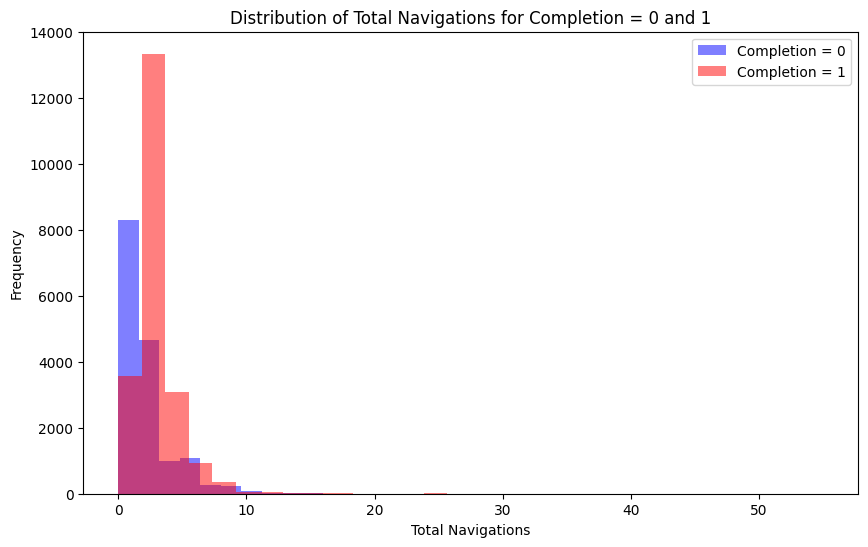

In [28]:
plt.figure(figsize=(10, 6))

# Histogram for completion = 0
plt.hist(df_test_final[df_test_final['completion'] == 0]['total_navigations'], 
         bins=30, alpha=0.5, label='Completion = 0', color='blue')

# Histogram for completion = 1
plt.hist(df_test_final[df_test_final['completion'] == 1]['total_navigations'], 
         bins=30, alpha=0.5, label='Completion = 1', color='red')

# Add titles and labels
plt.title('Distribution of Total Navigations for Completion = 0 and 1')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.legend()

# Save and show the plot
plot_path = "total_navigations_distribution_completion_0_1.png"
plt.savefig(plot_path)
plt.show()

In [29]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Assuming df_test_final is your DataFrame containing the necessary data
# Filter the data to include only rows where 'total_navigations' <= 30
filtered_df = df_test_final[df_test_final['total_navigations'] <= 30]

# Create histograms for 'total_navigations' for 'completion' values 0 and 1
fig = go.Figure()

# Histogram for completion = 0
fig.add_trace(go.Histogram(
    x=filtered_df[filtered_df['completion'] == 0]['total_navigations'],
    nbinsx=30,
    opacity=0.5,
    name='Completion = 0',
    marker_color='blue'
))

# Histogram for completion = 1
fig.add_trace(go.Histogram(
    x=filtered_df[filtered_df['completion'] == 1]['total_navigations'],
    nbinsx=30,
    opacity=0.5,
    name='Completion = 1',
    marker_color='red'
))

# Update layout
fig.update_layout(
    title='Distribution of Total Navigations for Completion = 0 and 1',
    xaxis_title='Total Navigations',
    yaxis_title='Frequency',
    barmode='overlay',
    legend_title_text='Completion'
)

# Show the plot

In [30]:
filtered_df = df_test_final[df_test_final['total_navigations'] <= 30]

# Calculate the frequency of 'total_navigations' for 'completion' values 0 and 1
freq_completion_0 = filtered_df[filtered_df['completion'] == 0]['total_navigations'].value_counts().sort_index()
freq_completion_1 = filtered_df[filtered_df['completion'] == 1]['total_navigations'].value_counts().sort_index()

# Create a line graph
fig = go.Figure()

# Line for completion = 0
fig.add_trace(go.Scatter(
    x=freq_completion_0.index,
    y=freq_completion_0.values,
    mode='lines+markers',
    name='Completion = 0',
    line=dict(color='blue')
))

# Line for completion = 1
fig.add_trace(go.Scatter(
    x=freq_completion_1.index,
    y=freq_completion_1.values,
    mode='lines+markers',
    name='Completion = 1',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations for Completion = 0 and 1',
    xaxis_title='Total Navigations',
    yaxis_title='Frequency',
    legend_title_text='Completion'
)

# Show the plot
fig.show()

In [31]:
import plotly.graph_objs as go
import pandas as pd

# Assuming df_test_final and df_control_final are your DataFrames containing the necessary data

# Filter the data to include only rows where 'total_navigations' <= 30 and 'completion' == 1
filtered_test_df = df_test_final[(df_test_final['total_navigations'] <= 30) & (df_test_final['completion'] == 1)]
filtered_control_df = df_control_final[(df_control_final['total_navigations'] <= 30) & (df_control_final['completion'] == 1)]

# Calculate the frequency of 'total_navigations' for 'completion' value 1
freq_test = filtered_test_df['total_navigations'].value_counts().sort_index()
freq_control = filtered_control_df['total_navigations'].value_counts().sort_index()

# Create a line graph
fig = go.Figure()

# Line for test data
fig.add_trace(go.Scatter(
    x=freq_test.index,
    y=freq_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line for control data
fig.add_trace(go.Scatter(
    x=freq_control.index,
    y=freq_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations for Completion = 1 (Test and Control)',
    xaxis_title='Total Navigations',
    yaxis_title='Frequency',
    legend_title_text='Data Source'
)

# Show the plot


In [32]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data for the first month
start_date = df_test_final['date'].min()
end_date = start_date + pd.DateOffset(days=30)

filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_date)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_date)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (First Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [33]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the second month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)

# Filter data for the second month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_second_month) & (df_test_final['date'] < end_second_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_second_month) & (df_control_final['date'] < end_second_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Second Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)


In [34]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the third month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)
start_third_month = end_second_month
end_third_month = start_third_month + pd.DateOffset(days=30)

# Filter data for the third month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_third_month) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_third_month) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Third Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [35]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the three months
start_date = df_test_final['date'].min()
end_third_month = start_date + pd.DateOffset(days=90)

# Filter data for the three months
filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Three Months)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [36]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['total_navigations'] == 3]
filtered_control_df = df_control_final[df_control_final['total_navigations'] == 3]

# Calculate daily completion rate for test data where total_navigations is 3
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data where total_navigations is 3
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Total Navigations = 3)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot

In [37]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['total_navigations'] == 3]
filtered_control_df = df_control_final[df_control_final['total_navigations'] == 3]

# Count occurrences of total_navigations = 3 by date for test data
counts_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date).size()

# Count occurrences of total_navigations = 3 by date for control data
counts_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date).size()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=counts_test.index,
    y=counts_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=counts_control.index,
    y=counts_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations = 3 by Date',
    xaxis_title='Date',
    yaxis_title='Frequency of Total Navigations = 3',
    legend_title_text='Data Source'
)

# Show the plot


In [38]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Function to calculate error rate and completion rate
def calculate_rates(df):
    # Sort the dataframe by 'visit_id' and 'date_time'
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Calculate the time difference between steps
    df['time_diff'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Identify completions (where process step is 'confirm')
    df['completion'] = df['process_step'] == 'confirm'
    
    # Convert 'process_step' to a category type and then to codes for numerical comparison
    df['process_step_code'] = df['process_step'].astype('category').cat.codes
    
    # Identify errors (going back to the previous step in less than 5 seconds)
    df['error'] = (df['time_diff'] < 3) & (df['process_step_code'].diff() < 0)
    
    # Calculate the daily error rate
    error_rate = df.groupby(df['date_time'].dt.date)['error'].mean()
    
    # Calculate the daily completion rate
    completion_rate = df.groupby(df['date_time'].dt.date)['completion'].mean()
    
    return error_rate, completion_rate

# Calculate rates for test data
error_rate_test, completion_rate_test = calculate_rates(df_test)

# Calculate rates for control data
error_rate_control, completion_rate_control = calculate_rates(df_control)

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='red')
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='orange')
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='green')
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

# Show the plot

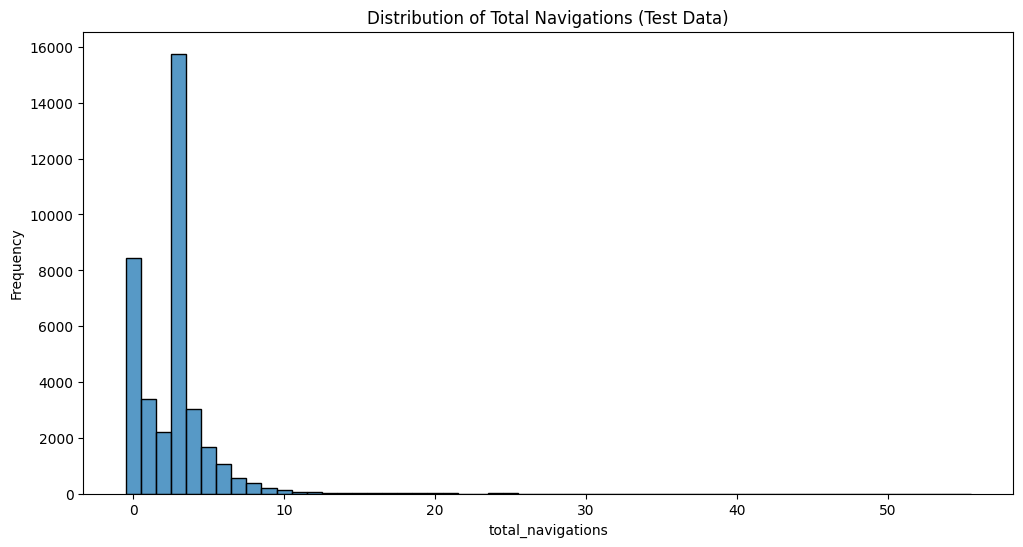

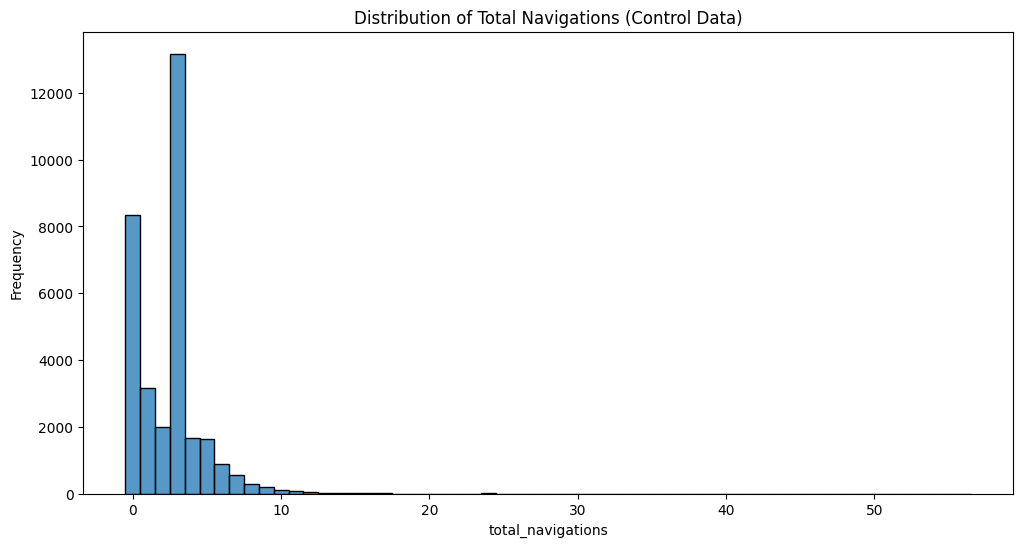

In [39]:
def plot_distribution(df, variable, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[variable], kde=False, discrete=True, bins=range(df[variable].max() + 1))
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for total navigations in both test and control datasets
plot_distribution(df_test_final, 'total_navigations', 'Distribution of Total Navigations (Test Data)')
plot_distribution(df_control_final, 'total_navigations', 'Distribution of Total Navigations (Control Data)')

In [40]:
from scipy.stats import shapiro

# Check normality for total_navigations
stat, p = shapiro(df_test_final['total_navigations'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=0.799, p=0.000
Sample does not look Gaussian (reject H0)


c:\Users\reetu\OneDrive\Documents\GitHub\project_2\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37122.



In [41]:
from scipy.stats import spearmanr, kendalltau

# Spearman correlation for test data
spearman_corr, spearman_p = spearmanr(df_test_final['total_navigations'], df_test_final['completion'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p}')

# Kendall's Tau correlation for test data
kendall_corr, kendall_p = kendalltau(df_test_final['total_navigations'], df_test_final['completion'])
print(f'Kendall Tau correlation: {kendall_corr}, p-value: {kendall_p}')

Spearman correlation: 0.32820363565910804, p-value: 0.0
Kendall Tau correlation: 0.295969569165304, p-value: 0.0


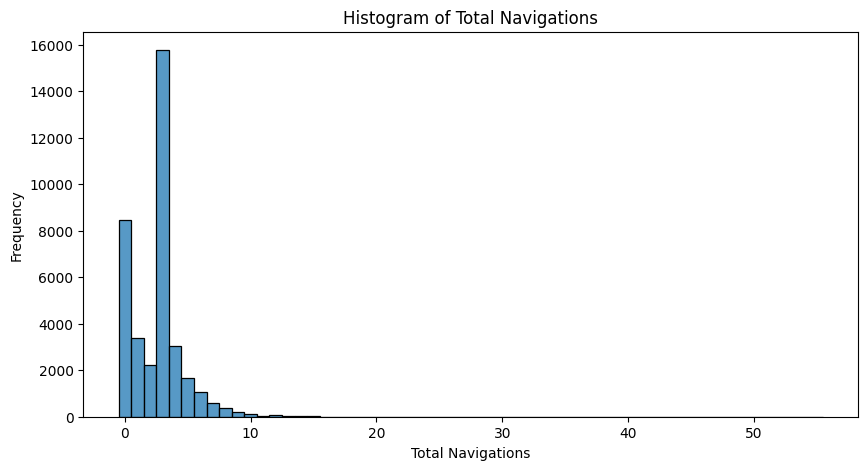

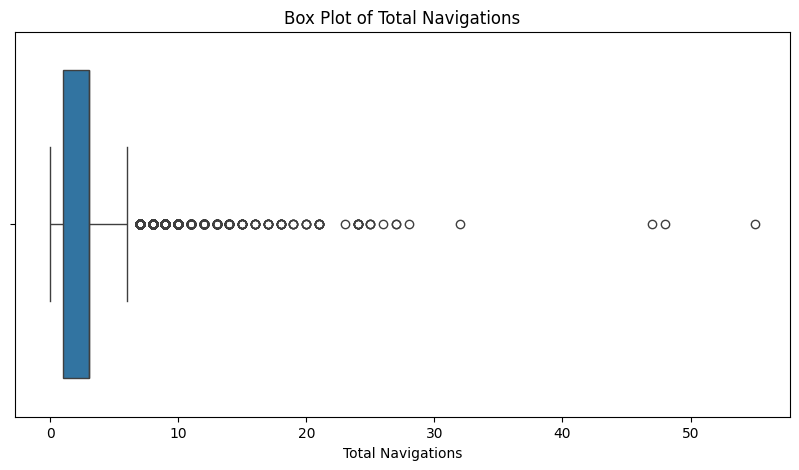

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_test_final['total_navigations'], kde=False, discrete=True)
plt.title('Histogram of Total Navigations')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_test_final['total_navigations'])
plt.title('Box Plot of Total Navigations')
plt.xlabel('Total Navigations')
plt.show()

In [43]:
# Log Transformation
df_test_final['log_total_navigations'] = np.log1p(df_test_final['total_navigations'])

# Check normality again after transformation
stat, p = shapiro(df_test_final['log_total_navigations'])
print('Shapiro-Wilk Test after Log Transformation: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Transformed sample looks Gaussian (fail to reject H0)')
else:
    print('Transformed sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test after Log Transformation: Statistics=0.842, p=0.000
Transformed sample does not look Gaussian (reject H0)


c:\Users\reetu\OneDrive\Documents\GitHub\project_2\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37122.



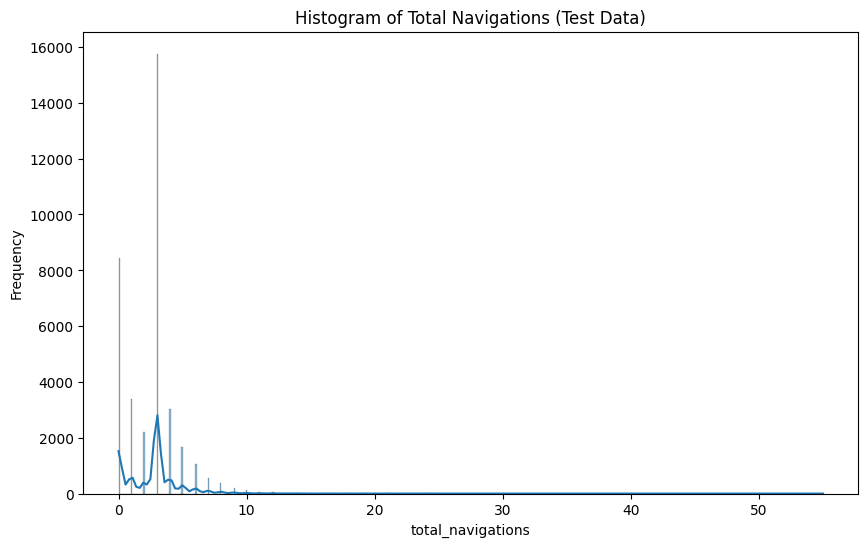

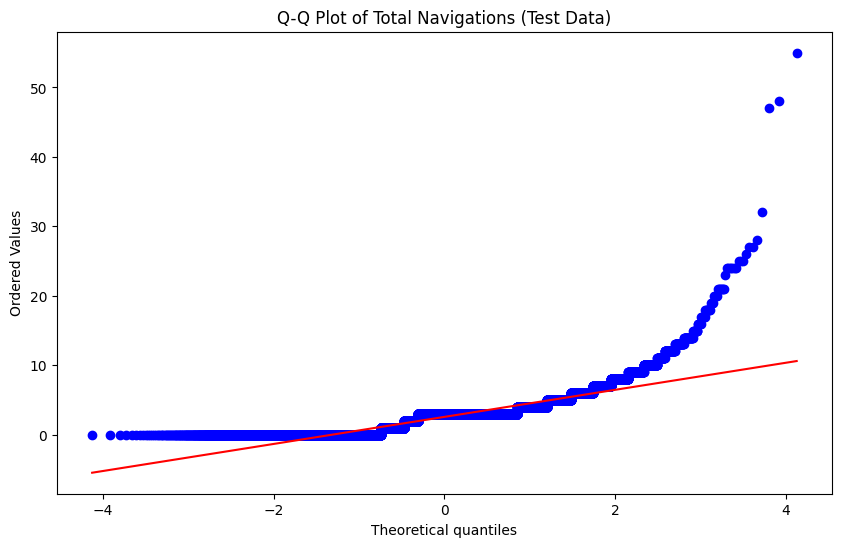

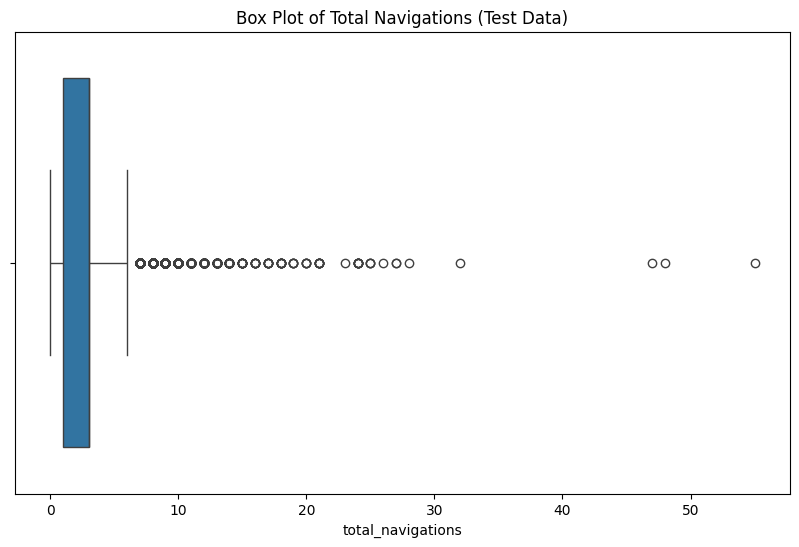

In [44]:
import scipy.stats as stats
def plot_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Q-Q Plot
def plot_qqplot(data, column, title):
    plt.figure(figsize=(10, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Box Plot
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Plot for 'total_navigations'
plot_histogram(df_test_final, 'total_navigations', 'Histogram of Total Navigations (Test Data)')
plot_qqplot(df_test_final, 'total_navigations', 'Q-Q Plot of Total Navigations (Test Data)')
plot_boxplot(df_test_final, 'total_navigations', 'Box Plot of Total Navigations (Test Data)')

In [45]:
def shapiro_wilk_test(data, column):
    stat, p = stats.shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(data, column):
    stat, p = stats.kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column])
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'{sl}%: {column} looks Gaussian (fail to reject H0)')
        else:
            print(f'{sl}%: {column} does not look Gaussian (reject H0)')

# D'Agostino's K-squared Test
def dagostino_test(data, column):
    stat, p = stats.normaltest(data[column])
    print(f'D\'Agostino\'s K-squared Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Apply tests for 'total_navigations'
shapiro_wilk_test(df_test_final, 'total_navigations')
kolmogorov_smirnov_test(df_test_final, 'total_navigations')
anderson_darling_test(df_test_final, 'total_navigations')
dagostino_test(df_test_final, 'total_navigations')

Shapiro-Wilk Test for total_navigations: Statistics=0.7994967197046152, p-value=6.277573715834853e-108
total_navigations does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test for total_navigations: Statistics=0.22660462015006955, p-value=0.0
total_navigations does not look Gaussian (reject H0)
Anderson-Darling Test for total_navigations: Statistic=1751.9790956097713
15.0%: total_navigations does not look Gaussian (reject H0)
10.0%: total_navigations does not look Gaussian (reject H0)
5.0%: total_navigations does not look Gaussian (reject H0)
2.5%: total_navigations does not look Gaussian (reject H0)
1.0%: total_navigations does not look Gaussian (reject H0)
D'Agostino's K-squared Test for total_navigations: Statistics=24605.584876584697, p-value=0.0
total_navigations does not look Gaussian (reject H0)


c:\Users\reetu\OneDrive\Documents\GitHub\project_2\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37122.



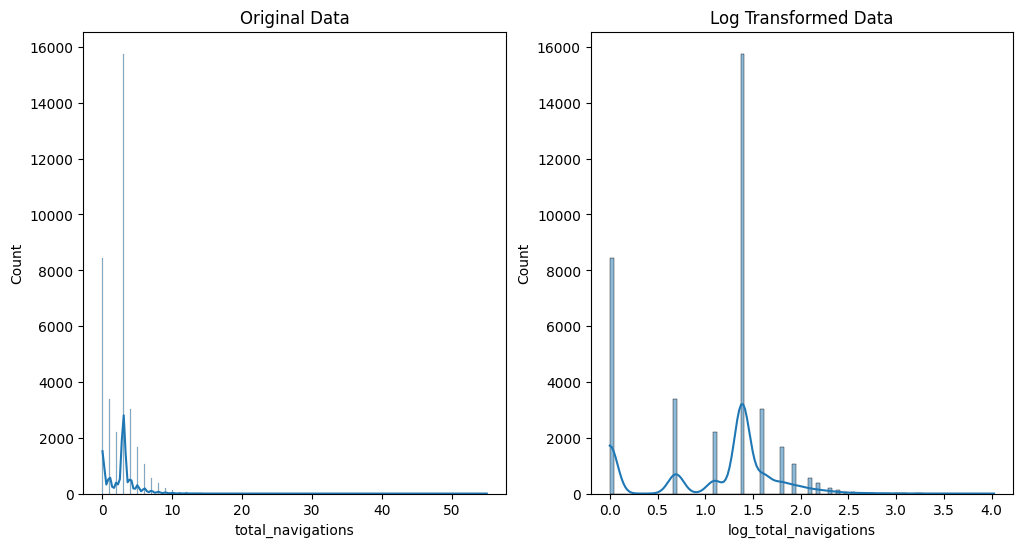

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['total_navigations'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.title('Log Transformed Data')
plt.show()

# Step by step EDA for numerical columns

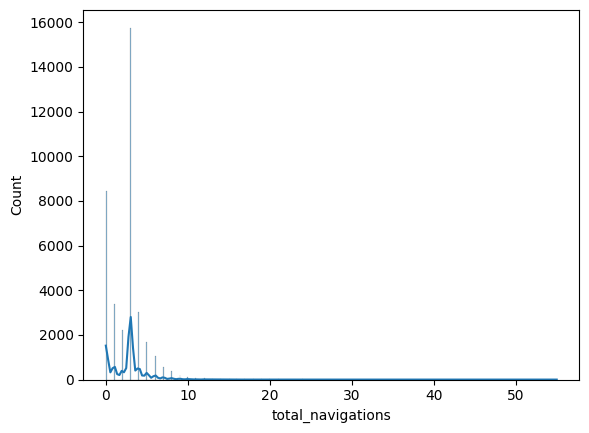

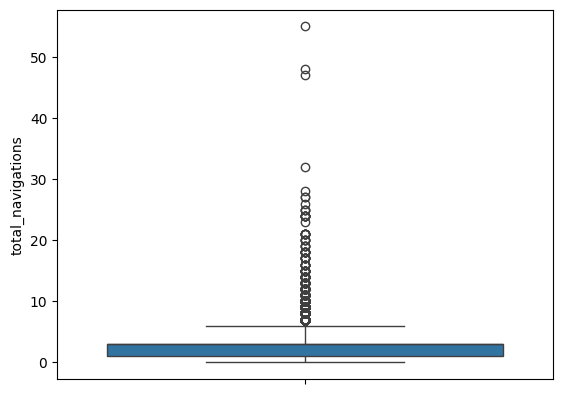

In [47]:
sns.histplot(df_test_final['total_navigations'], kde=True)
plt.show()
sns.boxplot(df_test_final['total_navigations'])
plt.show()

In [48]:
from scipy.stats import shapiro
shapiro_test = shapiro(df_test_final['total_navigations'])
print(shapiro_test)

ShapiroResult(statistic=np.float64(0.7994967197046152), pvalue=np.float64(6.277573715834853e-108))


c:\Users\reetu\OneDrive\Documents\GitHub\project_2\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37122.



In [49]:
from scipy import stats
z_scores = stats.zscore(df_test_final['total_navigations'])
outliers = np.where(np.abs(z_scores) > 3)
print(outliers)

(array([   72,    89,   127,   374,   479,   756,   797,  1073,  1205,
        1339,  1364,  1416,  1443,  1516,  1563,  1568,  1717,  1931,
        1962,  1977,  2244,  2270,  2350,  2374,  2385,  2412,  2518,
        2536,  2834,  2881,  2904,  3005,  3391,  3398,  3413,  3502,
        3619,  3684,  3858,  3866,  4106,  4192,  4347,  4544,  4887,
        4992,  5123,  5124,  5132,  5263,  5542,  5714,  5730,  5745,
        5899,  6019,  6051,  6096,  6118,  6395,  6466,  6575,  7050,
        7204,  7318,  7493,  7545,  7701,  7840,  7950,  7955,  8085,
        8088,  8133,  8174,  8199,  8359,  8419,  8420,  8557,  8617,
        8645,  9248,  9264,  9332,  9365,  9397,  9680,  9872,  9905,
        9981, 10041, 10062, 10264, 10362, 10447, 10484, 10498, 10585,
       10648, 10678, 10761, 10802, 10946, 11264, 11331, 11379, 11445,
       11542, 11740, 11814, 11850, 12119, 12626, 12706, 12770, 12888,
       12995, 13083, 13089, 13232, 13422, 13490, 13684, 14062, 14613,
       14646, 14869

In [50]:
skewness = df_test_final['total_navigations'].skew()
kurtosis = df_test_final['total_navigations'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 2.5587366302691095, Kurtosis: 28.557320061639647


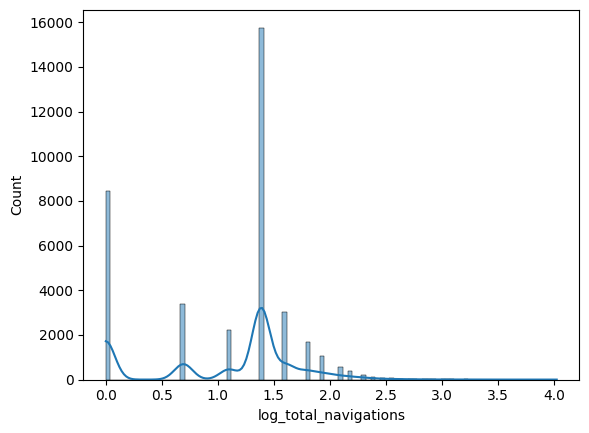

In [51]:
df_test_final['log_total_navigations'] = np.log(df_test_final['total_navigations'] + 1)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.show()

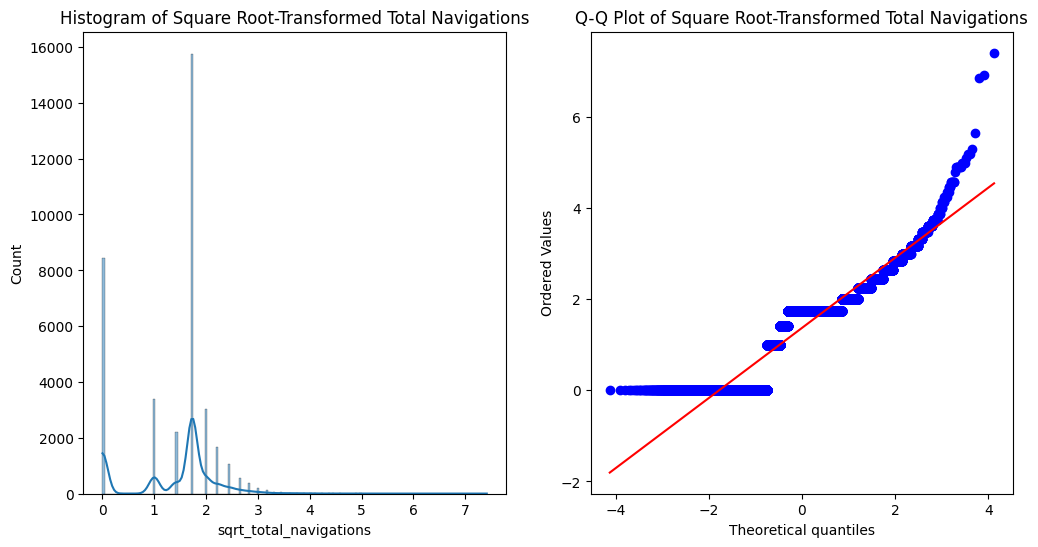

Shapiro-Wilk Test on Square Root-Transformed Data: Statistic=0.8395253612002281, p-value=4.052617664831663e-102


c:\Users\reetu\OneDrive\Documents\GitHub\project_2\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37122.



In [52]:
df_test_final['sqrt_total_navigations'] = np.sqrt(df_test_final['total_navigations'])

# Check distribution of square root-transformed total_navigations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['sqrt_total_navigations'], kde=True)
plt.title('Histogram of Square Root-Transformed Total Navigations')

plt.subplot(1, 2, 2)
stats.probplot(df_test_final['sqrt_total_navigations'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Square Root-Transformed Total Navigations')

plt.show()

# Perform Shapiro-Wilk test for normality on square root-transformed data
shapiro_test_sqrt = stats.shapiro(df_test_final['sqrt_total_navigations'])
print(f'Shapiro-Wilk Test on Square Root-Transformed Data: Statistic={shapiro_test_sqrt.statistic}, p-value={shapiro_test_sqrt.pvalue}')

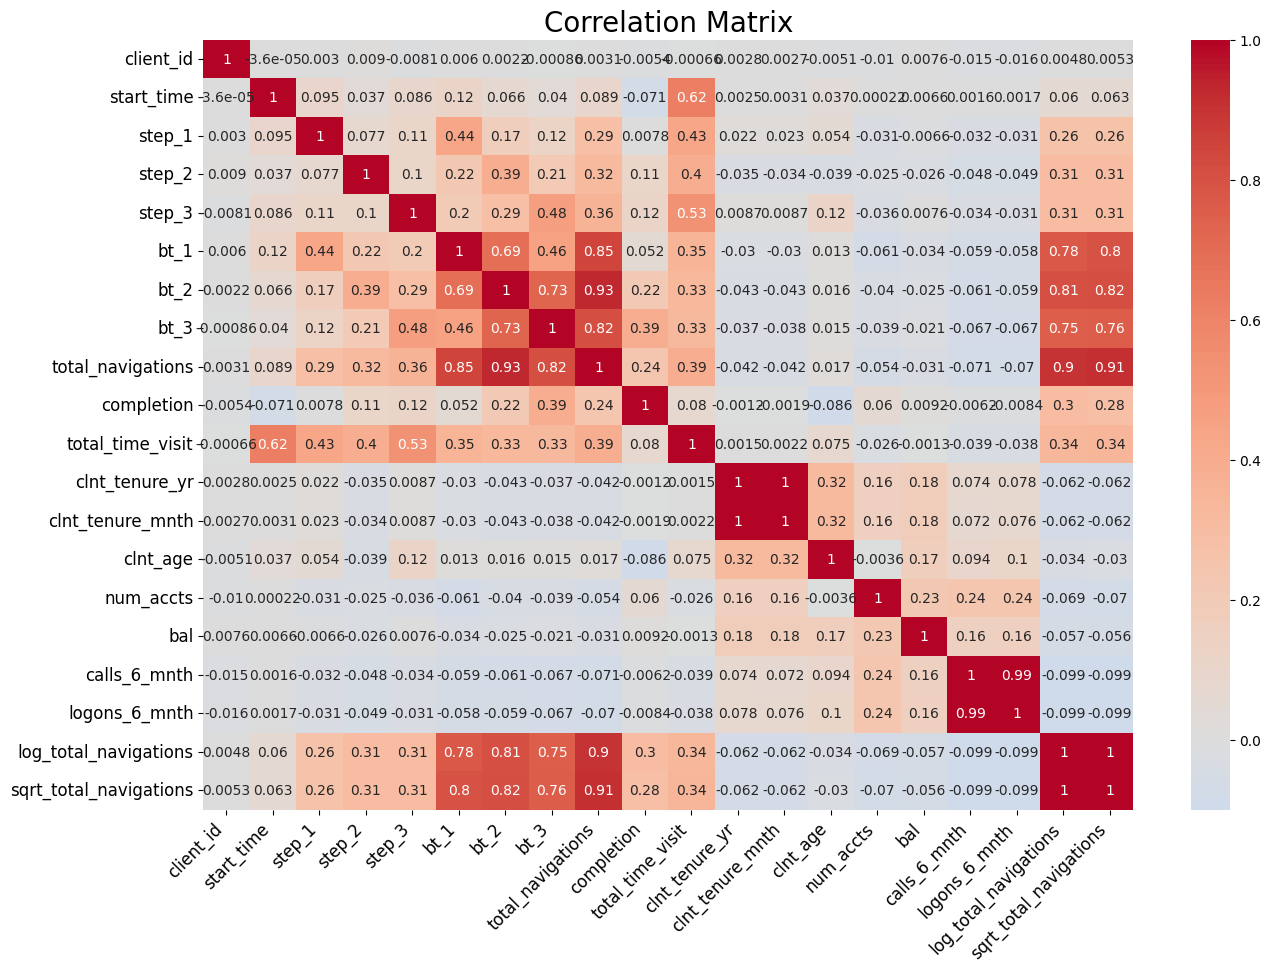

In [53]:
correlation_matrix = df_test_final.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})  # Adjust font size
plt.title('Correlation Matrix', fontsize=20)  # Adjust title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust x-axis tick labels
plt.yticks(rotation=0, fontsize=12)  # Adjust y-axis tick labels
plt.show()

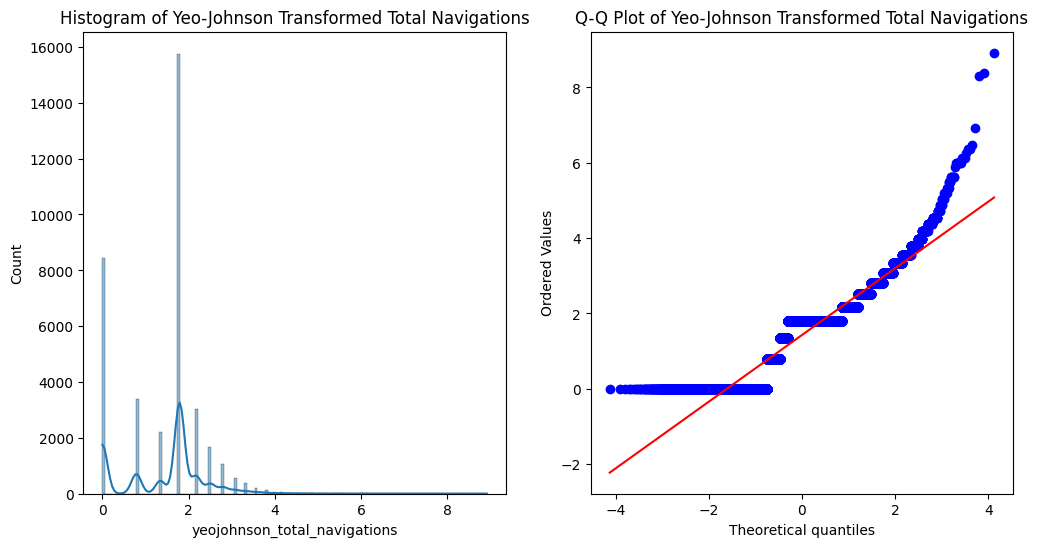

Shapiro-Wilk Test on Yeo-Johnson Transformed Data: Statistic=0.8722777997442556, p-value=2.4751287211102124e-96


c:\Users\reetu\OneDrive\Documents\GitHub\project_2\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37122.



In [54]:
df_test_final['yeojohnson_total_navigations'], fitted_lambda = stats.yeojohnson(df_test_final['total_navigations'])

# Check distribution of Yeo-Johnson transformed total_navigations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['yeojohnson_total_navigations'], kde=True)
plt.title('Histogram of Yeo-Johnson Transformed Total Navigations')

plt.subplot(1, 2, 2)
stats.probplot(df_test_final['yeojohnson_total_navigations'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Yeo-Johnson Transformed Total Navigations')

plt.show()

# Perform Shapiro-Wilk test for normality on Yeo-Johnson transformed data
shapiro_test_yeojohnson = stats.shapiro(df_test_final['yeojohnson_total_navigations'])
print(f'Shapiro-Wilk Test on Yeo-Johnson Transformed Data: Statistic={shapiro_test_yeojohnson.statistic}, p-value={shapiro_test_yeojohnson.pvalue}')

95% Confidence Interval for the mean of total navigations: [2.55399561 2.59845981]


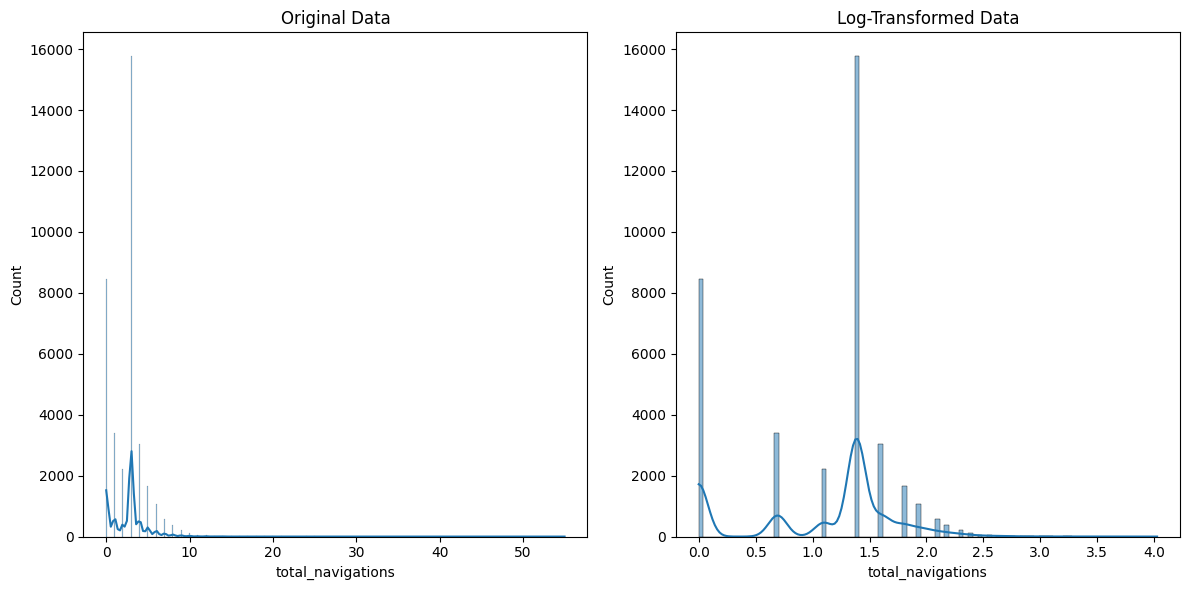

In [55]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Bootstrapping the mean of total navigations
bootstrapped_means = bootstrap_statistic(df_test_final['total_navigations'].dropna())

# Calculate confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)


import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df_test_final['total_navigations'], ax=axes[0], kde=True)
axes[0].set_title('Original Data')

sns.histplot(np.log1p(df_test_final['total_navigations']), ax=axes[1], kde=True)
axes[1].set_title('Log-Transformed Data')

plt.tight_layout()
plt.show()

95% Confidence Interval for the mean of total navigations: [2.55166411 2.59759913]


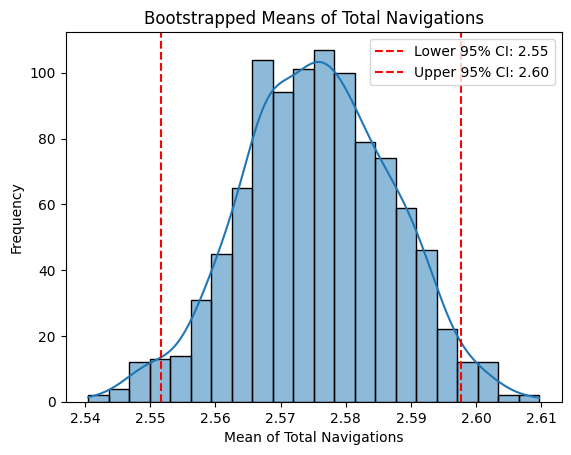

In [56]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Calculate bootstrapped means
bootstrapped_means = bootstrap_statistic(df_test_final['total_navigations'].dropna())

# Calculate 95% confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of bootstrapped means
sns.histplot(bootstrapped_means, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Lower 95% CI: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label=f'Upper 95% CI: {confidence_interval[1]:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

c:\Users\reetu\OneDrive\Documents\GitHub\project_2\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37122.



Statistic: 0.7994967197046152, P-value: 6.277573715834853e-108


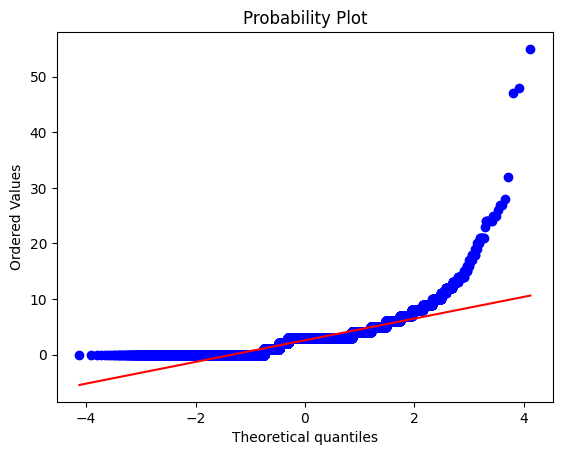

In [57]:
stat, p = shapiro(df_test_final['total_navigations'].dropna())
print(f'Statistic: {stat}, P-value: {p}')

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_test_final['total_navigations'], dist="norm", plot=plt)
plt.show()

95% Confidence Interval for the mean of total navigations: [2.554466354183503, 2.5988100048488767]


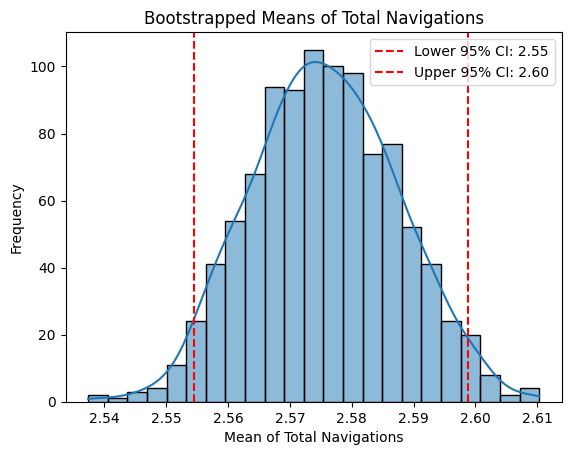

In [58]:
def bootstrap_mean(data, n_iterations=1000):
    boot_means = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means[i] = np.mean(sample)
    return boot_means

# Bootstrapped means for total_navigations
boot_means = bootstrap_mean(df_test_final['total_navigations'].dropna())

# Calculate 95% confidence intervals
ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])
print(f'95% Confidence Interval for the mean of total navigations: [{ci_low}, {ci_high}]')

# Plotting the bootstrapped means
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(boot_means, kde=True)
plt.axvline(ci_low, color='red', linestyle='--', label=f'Lower 95% CI: {ci_low:.2f}')
plt.axvline(ci_high, color='red', linestyle='--', label=f'Upper 95% CI: {ci_high:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

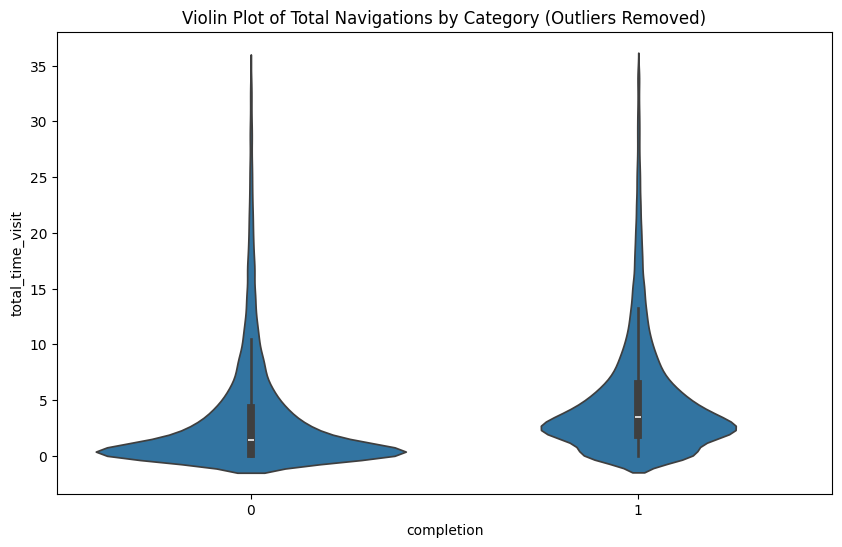

In [59]:
z_scores = stats.zscore(df_test_final['total_time_visit'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # Remove entries with z-score > 3
df_no_outliers = df_test_final[filtered_entries]

# Creating the violin plot without outliers
plt.figure(figsize=(10, 6))
sns.violinplot(x='completion', y='total_time_visit', data=df_no_outliers)
plt.title('Violin Plot of Total Navigations by Category (Outliers Removed)')
plt.show()

C:\Users\reetu\AppData\Local\Temp\ipykernel_15128\1175657883.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



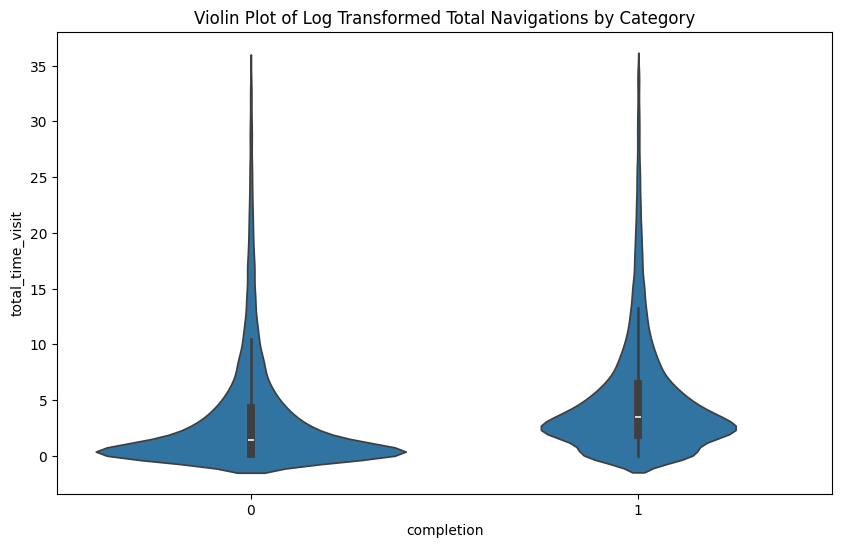

In [60]:
df_no_outliers['log_total_navigations'] = np.log1p(df_no_outliers['total_time_visit'])

# Creating the violin plot with transformed data
plt.figure(figsize=(10, 6))
sns.violinplot(x='completion', y='total_time_visit', data=df_no_outliers)
plt.title('Violin Plot of Log Transformed Total Navigations by Category')
plt.show()

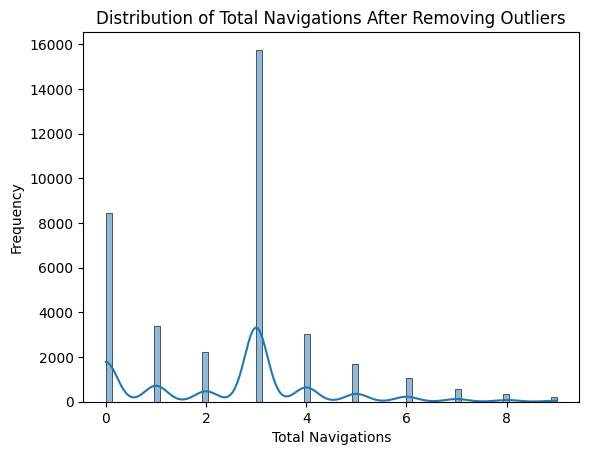

In [63]:
z_scores = np.abs(stats.zscore(df_test_final['total_navigations']))

# Define the threshold for identifying outliers
threshold = 3

# Get a boolean array indicating if each point is an outlier
outliers = z_scores > threshold

# Filter out the outliers
df_test_final_no_outliers = df_test_final[~outliers]

# Plotting the cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_test_final_no_outliers['total_navigations'], kde=True)
plt.title('Distribution of Total Navigations After Removing Outliers')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

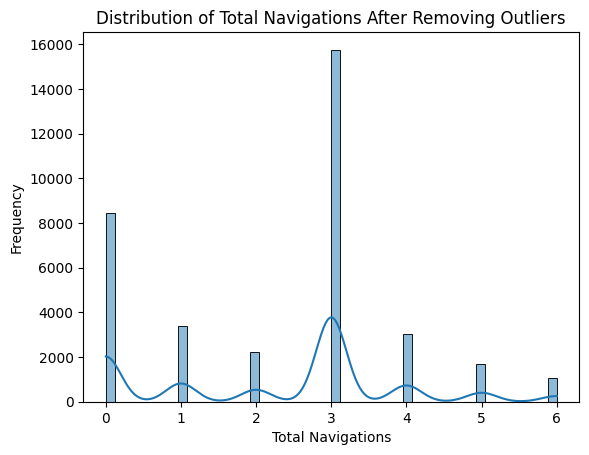

In [64]:
Q1 = df_test_final['total_navigations'].quantile(0.25)
Q3 = df_test_final['total_navigations'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_test_final_no_outliers = df_test_final[(df_test_final['total_navigations'] >= lower_bound) & 
                                          (df_test_final['total_navigations'] <= upper_bound)]

# Plotting the cleaned data
sns.histplot(df_test_final_no_outliers['total_navigations'], kde=True)
plt.title('Distribution of Total Navigations After Removing Outliers')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

## 1. Demographic Analysis


In [ ]:

# Univariate Analysis - Demographics
def demographic_analysis(df, title):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='gendr')
    plt.title(f'{title} - Gender Distribution')

    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='clnt_age', bins=20)
    plt.title(f'{title} - Age Distribution')

    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x='clnt_tenure_yr', bins=20)
    plt.title(f'{title} - Client Tenure (Years)')

    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='clnt_tenure_mnth', bins=20)
    plt.title(f'{title} - Client Tenure (Months)')

    plt.tight_layout()
    plt.show()

demographic_analysis(df_control_final, 'Control Group')
demographic_analysis(df_test_final, 'Test Group')


### Demographic side by side comparisson 

In [ ]:
def visualize_side_by_side(df1, df2, title1, title2, col):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df1, x=col, bins=20)
    plt.title(title1)

    plt.subplot(1, 2, 2)
    sns.histplot(data=df2, x=col, bins=20)
    plt.title(title2)

    plt.tight_layout()
    plt.show()

visualize_side_by_side(df_control_final, df_test_final, 'Control Group', 'Test Group', 'clnt_age')
visualize_side_by_side(df_control_final, df_test_final, 'Control Group', 'Test Group', 'clnt_tenure_yr')

## 2. Client Behaviour Analysis


In [ ]:
# Bivariate Analysis - Steps and Time
def behavior_analysis(df, title):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='start_time', bins=20)
    plt.title(f'{title} - Start Time')

    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='step_1', bins=20)
    plt.title(f'{title} - Step 1 Time')

    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x='step_2', bins=20)
    plt.title(f'{title} - Step 2 Time')

    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='step_3', bins=20)
    plt.title(f'{title} - Step 3 Time')

    plt.tight_layout()
    plt.show()

behavior_analysis(df_control_final, 'Control Group')
behavior_analysis(df_test_final, 'Test Group')


## 3. Key Performance Indicators (KPIs)


In [ ]:

# Calculate KPIs
def calculate_kpis(df):
    kpis = {}

    # Completion Rate
    total_visits = df['visit_visitor_id'].nunique()
    completed_visits = df[df['last_step'] == 'confirm']['visit_visitor_id'].nunique()
    kpis['completion_rate'] = completed_visits / total_visits

    # Time Spent on Each Step
    kpis['avg_start_time'] = df['start_time'].mean()
    kpis['avg_step_1_time'] = df['step_1'].mean()
    kpis['avg_step_2_time'] = df['step_2'].mean()
    kpis['avg_step_3_time'] = df['step_3'].mean()

    # Error Rates
    errors = df[(df['step_1'] < df['start_time']) | (df['step_2'] < df['step_1']) | (df['step_3'] < df['step_2'])]
    kpis['error_rate'] = errors['visit_visitor_id'].nunique() / total_visits

    return kpis

kpis_control = calculate_kpis(df_control_final)
kpis_test = calculate_kpis(df_test_final)

print("Control Group KPIs:", kpis_control)
print("Test Group KPIs:", kpis_test)

# Convert KPIs to DataFrame for visualization
kpis_df = pd.DataFrame([kpis_control, kpis_test], index=['Control', 'Test']).reset_index()
kpis_df = kpis_df.melt(id_vars='index', var_name='KPI', value_name='Value')

# Visualization
plt.figure(figsize=(15, 8))

# Completion Rate
plt.subplot(2, 2, 1)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'completion_rate'], x='index', y='Value')
plt.title('Completion Rate')
plt.ylabel('Completion Rate')
plt.xlabel('Group')

# Average Time Spent on Each Step
plt.subplot(2, 2, 2)
sns.barplot(data=kpis_df[kpis_df['KPI'].str.contains('avg')], x='KPI', y='Value', hue='index')
plt.title('Average Time Spent on Each Step')
plt.ylabel('Average Time (seconds)')
plt.xlabel('Step')
plt.xticks(rotation=45)

# Error Rates
plt.subplot(2, 2, 3)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'error_rate'], x='index', y='Value')
plt.title('Error Rate')
plt.ylabel('Error Rate')
plt.xlabel('Group')

plt.tight_layout()
plt.show()


## 4. Hypothesis Testing

### 4.1. Completion Rate

In [ ]:

# Calculate KPIs
def calculate_kpis(df):
    kpis = {}
    total_visits = df['visit_visitor_id'].nunique()
    completed_visits = df[df['last_step'] == 'confirm']['visit_visitor_id'].nunique()
    
    # KPIs Calculation
    kpis['completion_rate'] = completed_visits / total_visits
    kpis['avg_start_time'] = df['start_time'].mean()
    kpis['avg_step_1_time'] = df['step_1'].mean()
    kpis['avg_step_2_time'] = df['step_2'].mean()
    kpis['avg_step_3_time'] = df['step_3'].mean()

    errors = df[(df['step_1'] < df['start_time']) | (df['step_2'] < df['step_1']) | (df['step_3'] < df['step_2'])]

    kpis['error_rate'] = errors['visit_visitor_id'].nunique() / total_visits
    
    return kpis, total_visits, completed_visits

kpis_control, total_visits_control, completed_visits_control = calculate_kpis(df_control_final)
kpis_test, total_visits_test, completed_visits_test = calculate_kpis(df_test_final)

print("Control Group KPIs:", kpis_control)
print("Test Group KPIs:", kpis_test)

# Chi-Squared Test for Completion Rate
contingency_table = pd.DataFrame({
    'Completed': [completed_visits_control, completed_visits_test],
    'Not Completed': [total_visits_control - completed_visits_control, total_visits_test - completed_visits_test]
}, index=['Control', 'Test'])

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Squared Test p-value:", p)

# Convert KPIs to DataFrame for visualization
kpis_df = pd.DataFrame([kpis_control, kpis_test], index=['Control', 'Test']).reset_index()
kpis_df = kpis_df.melt(id_vars='index', var_name='KPI', value_name='Value')

# Visualization
plt.figure(figsize=(15, 8))

# Completion Rate
plt.subplot(2, 2, 1)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'completion_rate'], x='index', y='Value')
plt.title('Completion Rate')
plt.ylabel('Completion Rate')
plt.xlabel('Group')

# Average Time Spent on Each Step
plt.subplot(2, 2, 2)
sns.barplot(data=kpis_df[kpis_df['KPI'].str.contains('avg')], x='KPI', y='Value', hue='index')
plt.title('Average Time Spent on Each Step')
plt.ylabel('Average Time (seconds)')
plt.xlabel('Step')
plt.xticks(rotation=45)

# Error Rates
plt.subplot(2, 2, 3)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'error_rate'], x='index', y='Value')
plt.title('Error Rate')
plt.ylabel('Error Rate')
plt.xlabel('Group')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Sample data for illustration
# df_control_final and df_control_test should be defined with the columns mentioned in the problem statement

def calculate_kpis(df):
    kpis = {}

    # Completion Rate
    total_visits = df['visit_visitor_id'].nunique()
    completed_visits = df[df['last_step'] == 'confirm']['visit_visitor_id'].nunique()
    kpis['completion_rate'] = completed_visits / total_visits

    # Time Spent on Each Step
    kpis['avg_start_time'] = df['start_time'].mean()
    kpis['avg_step_1_time'] = df['step_1'].mean()
    kpis['avg_step_2_time'] = df['step_2'].mean()
    kpis['avg_step_3_time'] = df['step_3'].mean()

    # Error Rates (new definition)
    errors_bt_1 = df['bt_1'].duplicated(subset=['visit_visitor_id'], keep=False).sum()
    errors_bt_2 = df['bt_2'].duplicated(subset=['visit_visitor_id'], keep=False).sum()
    errors_bt_3 = df['bt_3'].duplicated(subset=['visit_visitor_id'], keep=False).sum()
    total_errors = errors_bt_1 + errors_bt_2 + errors_bt_3

    kpis['error_rate'] = total_errors / total_visits

    return kpis

# Calculate KPIs for control and test groups
kpis_control = calculate_kpis(df_control_final)
kpis_test = calculate_kpis(df_control_test)

print("Control Group KPIs:", kpis_control)
print("Test Group KPIs:", kpis_test)


### 4.2. Cost-Effectiveness Threshold

In [ ]:
# Cost-Effectiveness Analysis
completion_rate_increase = kpis_test['completion_rate'] - kpis_control['completion_rate']
print("Completion Rate Increase:", completion_rate_increase)

if completion_rate_increase >= 0.05:
    print("The new design meets the cost-effectiveness threshold.")
else:
    print("The new design does not meet the cost-effectiveness threshold.")


### 4.3. Other Hypothesis Testing

In [ ]:


# Average Age Hypothesis Test
t_stat_age, p_value_age = ttest_ind(df_control_final['clnt_age'], df_test_final['clnt_age'])
print("Average Age t-test p-value:", p_value_age)

# Client Tenure Hypothesis Test
t_stat_tenure, p_value_tenure = ttest_ind(df_control_final['clnt_tenure_yr'], df_test_final['clnt_tenure_yr'])
print("Client Tenure t-test p-value:", p_value_tenure)

# Gender Difference Hypothesis Test
gender_counts_control = df_control_final['gendr'].value_counts()
gender_counts_test = df_test_final['gendr'].value_counts()

# Create a contingency table
contingency_table = pd.DataFrame([gender_counts_control, gender_counts_test], index=['Control', 'Test'])

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Gender Difference Chi-Squared Test p-value:", p)



## 5. Experiment Evaluation


In [ ]:


# Experiment Design Evaluation with Visualizations
def experiment_evaluation_with_visualizations(df_control, df_test):
    control_size = df_control['visit_visitor_id'].nunique()
    test_size = df_test['visit_visitor_id'].nunique()

    print("Control Group Size:", control_size)
    print("Test Group Size:", test_size)

    # Plot Group Sizes
    plt.figure(figsize=(10, 5))
    plt.bar(['Control', 'Test'], [control_size, test_size], color=['blue', 'orange'])
    plt.title('Group Sizes')
    plt.ylabel('Number of Unique Visitors')
    plt.show()

    # Gender Distribution
    gender_dist_control = df_control['gendr'].value_counts(normalize=True)
    gender_dist_test = df_test['gendr'].value_counts(normalize=True)

    print("Gender Distribution Control:\n", gender_dist_control)
    print("Gender Distribution Test:\n", gender_dist_test)

    # Plot Gender Distribution
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].pie(gender_dist_control, labels=gender_dist_control.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
    axs[0].set_title('Gender Distribution - Control Group')

    axs[1].pie(gender_dist_test, labels=gender_dist_test.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    axs[1].set_title('Gender Distribution - Test Group')

    plt.show()

experiment_evaluation_with_visualizations(df_control_final, df_test_final)


In [ ]:
# Additional Data Needs
print("Additional data that could enhance the analysis:")
print("- Detailed logs of user interactions (e.g., clicks, hovers)")
print("- Feedback or survey data on user satisfaction")
print("- Data on external factors that could influence user behavior (e.g., marketing campaigns)")
